In [ ]:
### model1 전처리 ###

In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'C:/Users/a/Desktop/프로젝트/model1.csv'
data1 = pd.read_csv(file_path)

data1.head()

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,isolated_power,xba,woba,xiso,...,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed
0,"Cabrera, Miguel",408234,2021,526,22.4,7.6,0.130,0.234,0.305,0.186,...,91.4,10.0,32.8,8.3,49.0,101.953387,95.613068,21.5,5.01,24.0
1,"Molina, Yadier",425877,2021,473,16.7,5.1,0.118,0.255,0.290,0.151,...,88.0,15.3,34.1,5.2,31.6,97.653775,92.936144,21.7,4.92,22.8
2,"Cruz Jr., Nelson",443558,2021,584,21.6,8.7,0.232,0.264,0.346,0.248,...,92.9,11.8,31.8,13.6,52.5,105.497885,97.364589,22.0,4.69,26.0
3,"Peralta, David",444482,2021,538,17.1,8.6,0.143,0.243,0.314,0.103,...,89.3,5.3,27.2,5.0,41.8,101.204663,94.748490,23.2,4.38,27.6
4,"Escobar, Alcides",444876,2021,349,16.0,4.9,0.116,0.271,0.325,0.091,...,81.7,11.1,36.3,3.0,21.0,93.737836,91.096948,28.8,4.36,27.5


In [36]:
# No missing data
missing_data = data1.isnull().sum()
missing_data

last_name, first_name    0
player_id                0
year                     0
pa                       0
k_percent                0
bb_percent               0
isolated_power           0
xba                      0
woba                     0
xiso                     0
wobacon                  0
xwobacon                 0
xbacon                   0
exit_velocity_avg        0
launch_angle_avg         0
sweet_spot_percent       0
barrel_batted_rate       0
hard_hit_percent         0
avg_best_speed           0
avg_hyper_speed          0
linedrives_percent       0
hp_to_1b                 0
sprint_speed             0
dtype: int64

In [37]:
# Getting rid of columns we don't need
data1 = data1.drop(columns=['last_name, first_name', 'year', 'pa'], errors='ignore')

In [38]:
columns_of_interest = ['k_percent', 'bb_percent', 'isolated_power', 'xba', 'woba', 'xiso','wobacon', 'xwobacon', 'xbacon',
    'exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent', 
    'barrel_batted_rate', 'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed',
    'linedrives_percent', 'hp_to_1b', 'sprint_speed']

# Subsetting the data to these columns
selected_data = data1[columns_of_interest]

# Displaying a snapshot of selected columns to confirm selection
selected_data.head()

,k_percent,bb_percent,isolated_power,xba,woba,xiso,wobacon,xwobacon,xbacon,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed
0,22.4,7.6,0.130,0.234,0.305,0.186,0.356,0.372,0.312,91.4,10.0,32.8,8.3,49.0,101.953387,95.613068,21.5,5.01,24.0
1,16.7,5.1,0.118,0.255,0.290,0.151,0.321,0.343,0.310,88.0,15.3,34.1,5.2,31.6,97.653775,92.936144,21.7,4.92,22.8
2,21.6,8.7,0.232,0.264,0.346,0.248,0.414,0.439,0.353,92.9,11.8,31.8,13.6,52.5,105.497885,97.364589,22.0,4.69,26.0
3,17.1,8.6,0.143,0.243,0.314,0.103,0.343,0.315,0.300,89.3,5.3,27.2,5.0,41.8,101.204663,94.748490,23.2,4.38,27.6
4,16.0,4.9,0.116,0.271,0.325,0.091,0.356,0.335,0.328,81.7,11.1,36.3,3.0,21.0,93.737836,91.096948,28.8,4.36,27.5


In [39]:
# Performing correlation analysis on the selected variables to see their relation with 'woba'
correlation_matrix = selected_data.corr()

# Extracting correlations of each feature with 'woba' for targeted insight
woba_correlations = correlation_matrix['woba'].sort_values(ascending=False)
woba_correlations

woba                  1.000000
wobacon               0.793143
isolated_power        0.755057
xiso                  0.685940
xwobacon              0.657593
xbacon                0.636695
xba                   0.609533
barrel_batted_rate    0.571757
avg_hyper_speed       0.548462
exit_velocity_avg     0.546478
hard_hit_percent      0.535382
avg_best_speed        0.529912
bb_percent            0.465344
sweet_spot_percent    0.333362
linedrives_percent    0.160668
launch_angle_avg      0.129969
sprint_speed         -0.007732
hp_to_1b             -0.008745
k_percent            -0.091422
Name: woba, dtype: float64

In [40]:
# Assuming `selected_data` is already extracted from the dataset
# Handling outliers by capping them at the 1st and 99th percentiles
for column in selected_data.columns:
    lower_bound = np.percentile(selected_data[column], 1)
    upper_bound = np.percentile(selected_data[column], 99)
    selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)

# Displaying summary statistics after outlier handling
selected_data.describe()

C:\Users\a\AppData\Local\Temp\ipykernel_35872\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_35872\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_35872\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,k_percent,bb_percent,isolated_power,xba,woba,xiso,wobacon,xwobacon,xbacon,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,21.910644,8.476565,0.166626,0.249356,0.320854,0.165396,0.375493,0.377023,0.330535,89.071463,13.031216,33.985249,8.339628,39.963599,99.952511,94.235993,23.920583,4.467065,27.297496
std,5.716803,2.801871,0.053015,0.024503,0.034659,0.053655,0.053574,0.052554,0.029617,2.115698,4.521335,3.593069,4.049616,7.224418,2.356601,1.375763,2.858725,0.194473,1.321672
min,10.017000,3.200000,0.060340,0.191340,0.245000,0.066000,0.266170,0.277170,0.269170,84.117000,2.800000,25.734000,1.117000,21.634000,94.484371,91.302907,16.951000,4.110000,23.700000
25%,17.725000,6.400000,0.127000,0.233000,0.298000,0.127250,0.338000,0.338000,0.310000,87.700000,10.000000,31.500000,5.200000,35.400000,98.371044,93.285052,21.825000,4.330000,26.400000
50%,21.600000,8.300000,0.162000,0.249000,0.319500,0.161000,0.370000,0.372000,0.329000,89.000000,13.150000,34.000000,7.900000,40.150000,99.887999,94.154369,23.900000,4.430000,27.400000
75%,25.800000,10.300000,0.201000,0.265000,0.343000,0.200000,0.410000,0.413000,0.350000,90.400000,16.100000,36.375000,10.975000,44.900000,101.441696,95.073982,25.900000,4.600000,28.300000
max,35.183000,15.900000,0.311980,0.312830,0.419000,0.316660,0.529660,0.526320,0.411830,94.566000,22.600000,42.900000,20.100000,55.883000,106.095136,98.129434,30.900000,5.036600,30.100000


In [41]:
# Identify highly correlated factors and decide between MinMax and normalization.
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
scaling_method = 'MinMaxScaler' if not highly_correlated_pairs.empty else 'StandardScaler'

highly_correlated_pairs

isolated_power      xiso                  0.893237
                    wobacon               0.833247
                    barrel_batted_rate    0.845054
xiso                isolated_power        0.893237
                    xwobacon              0.919534
                    barrel_batted_rate    0.946862
                    avg_hyper_speed       0.807653
wobacon             isolated_power        0.833247
                    xwobacon              0.873522
                    barrel_batted_rate    0.806353
xwobacon            xiso                  0.919534
                    wobacon               0.873522
                    xbacon                0.910356
                    barrel_batted_rate    0.922148
                    hard_hit_percent      0.814620
                    avg_best_speed        0.830513
                    avg_hyper_speed       0.841671
xbacon              xwobacon              0.910356
exit_velocity_avg   hard_hit_percent      0.934119
                    avg_best_sp

In [42]:
scaling_method

'MinMaxScaler'

In [43]:
# Creating new derived features based on highly correlated pairs insights

# Power Contact: combining isolated power, xiso, and barrel batted rate
selected_data['power_contact'] = (
    selected_data['isolated_power'] + selected_data['xiso'] + selected_data['barrel_batted_rate']
)

# Velocity Strength: averaging exit velocity, best speed, and hyper speed
selected_data['velocity_strength'] = (
    selected_data['exit_velocity_avg'] + selected_data['avg_best_speed'] + selected_data['avg_hyper_speed']
) / 3

# Consistency: combining hard hit percent, best speed, and hyper speed to reflect consistency in hitting strength
selected_data['consistency'] = (
    selected_data['hard_hit_percent'] + selected_data['avg_best_speed'] + selected_data['avg_hyper_speed']
)

# Displaying the first few rows to verify the new combined features
new_derived_data= selected_data[['power_contact', 'velocity_strength', 'consistency']]
new_derived_data

,power_contact,velocity_strength,consistency
0,8.616,96.322152,246.566456
1,5.469,92.863307,222.189920
2,14.080,98.587492,255.362475
3,5.246,95.084384,237.753152
4,3.207,89.968093,207.421278
...,...,...,...
1113,9.636,95.206155,239.418464
1114,10.936,98.168487,253.705462
1115,1.741,91.719689,218.259067
1116,11.748,95.315831,239.447492


In [44]:
# Concatenating the new features with the original data
new_derived_data= selected_data[['power_contact', 'velocity_strength', 'consistency']]
final_data = pd.concat([data1.reset_index(drop=True), new_derived_data.reset_index(drop=True)], axis=1)

# Displaying the first few rows to verify the concatenation
final_data.head()

,player_id,k_percent,bb_percent,isolated_power,xba,woba,xiso,wobacon,xwobacon,xbacon,...,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed,power_contact,velocity_strength,consistency
0,408234,22.4,7.6,0.130,0.234,0.305,0.186,0.356,0.372,0.312,...,8.3,49.0,101.953387,95.613068,21.5,5.01,24.0,8.616,96.322152,246.566456
1,425877,16.7,5.1,0.118,0.255,0.290,0.151,0.321,0.343,0.310,...,5.2,31.6,97.653775,92.936144,21.7,4.92,22.8,5.469,92.863307,222.189920
2,443558,21.6,8.7,0.232,0.264,0.346,0.248,0.414,0.439,0.353,...,13.6,52.5,105.497885,97.364589,22.0,4.69,26.0,14.080,98.587492,255.362475
3,444482,17.1,8.6,0.143,0.243,0.314,0.103,0.343,0.315,0.300,...,5.0,41.8,101.204663,94.748490,23.2,4.38,27.6,5.246,95.084384,237.753152
4,444876,16.0,4.9,0.116,0.271,0.325,0.091,0.356,0.335,0.328,...,3.0,21.0,93.737836,91.096948,28.8,4.36,27.5,3.207,89.968093,207.421278


In [45]:
# Scaling
# Define lists of proportion-based and numeric features
proportion_features = ["k_percent", "bb_percent", "hard_hit_percent", 
    "sweet_spot_percent", "barrel_batted_rate", 
    "linedrives_percent"]
numeric_features = final_data.select_dtypes(include=[float, int]).columns.difference(['woba'] + proportion_features)

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler to proportion-based features
final_data[proportion_features] = standard_scaler.fit_transform(final_data[proportion_features])

# Apply MinMaxScaler to numeric features, ensuring only numeric columns are scaled
final_data[numeric_features] = minmax_scaler.fit_transform(final_data[numeric_features])

In [46]:
# Multicollinearity Check
# Calculate the correlation matrix on the scaled data
correlation_matrix = final_data.corr()

# Identify pairs of features with correlation > 0.8
high_corr_pairs = []
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display pairs of features with high correlation
high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_pairs_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

,Feature 1,Feature 2,Correlation
0,power_contact,barrel_batted_rate,0.995760
1,avg_hyper_speed,avg_best_speed,0.994355
2,consistency,hard_hit_percent,0.992581
3,velocity_strength,avg_hyper_speed,0.991050
4,velocity_strength,avg_best_speed,0.984340
5,consistency,velocity_strength,0.983418
6,consistency,avg_hyper_speed,0.979646
7,consistency,avg_best_speed,0.973993
8,velocity_strength,exit_velocity_avg,0.966399
9,velocity_strength,hard_hit_percent,0.963529


In [47]:
### model2 전처리 ###

In [48]:
file_path = 'C:/Users/a/Desktop/프로젝트/model2.csv'
data2 = pd.read_csv(file_path)

data2.head()

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,on_base_percent,b_walkoff,z_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,whiff_percent,swing_percent
0,"Cabrera, Miguel",408234,2021,526,22.4,7.6,0.316,1,69.1,30.2,57.1,82.0,25.8,49.4
1,"Molina, Yadier",425877,2021,473,16.7,5.1,0.297,2,76.0,38.9,63.3,82.7,24.0,57.1
2,"Cruz Jr., Nelson",443558,2021,584,21.6,8.7,0.334,1,73.8,31.0,52.6,77.3,30.7,51.0
3,"Peralta, David",444482,2021,538,17.1,8.6,0.325,1,66.3,27.4,59.6,86.6,21.3,46.5
4,"Escobar, Alcides",444876,2021,349,16.0,4.9,0.340,1,69.2,35.5,64.1,83.5,21.6,52.1


In [49]:
# No missing data
missing_data = data2.isnull().sum()
missing_data

last_name, first_name    0
player_id                0
year                     0
pa                       0
k_percent                0
bb_percent               0
on_base_percent          0
b_walkoff                0
z_swing_percent          0
oz_swing_percent         0
oz_contact_percent       0
iz_contact_percent       0
whiff_percent            0
swing_percent            0
dtype: int64

In [50]:
# Getting rid of columns we don't need
data2 = data2.drop(columns=['last_name, first_name', 'year', 'pa'], errors='ignore')

In [51]:
# 'b_walkoff' 변수 제외한 나머지 변수들을 모두 변수선택
columns_of_interest = ['k_percent', 'bb_percent', 'on_base_percent', 
                       'z_swing_percent', 'oz_swing_percent', 'oz_contact_percent',
                       'iz_contact_percent', 'whiff_percent', 'swing_percent']

# Subsetting the data to these columns
selected_data = data2[columns_of_interest]

# Displaying a snapshot of selected columns to confirm selection
selected_data.head()

,k_percent,bb_percent,on_base_percent,z_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,whiff_percent,swing_percent
0,22.4,7.6,0.316,69.1,30.2,57.1,82.0,25.8,49.4
1,16.7,5.1,0.297,76.0,38.9,63.3,82.7,24.0,57.1
2,21.6,8.7,0.334,73.8,31.0,52.6,77.3,30.7,51.0
3,17.1,8.6,0.325,66.3,27.4,59.6,86.6,21.3,46.5
4,16.0,4.9,0.340,69.2,35.5,64.1,83.5,21.6,52.1


In [52]:
# 각 변수별 상관관계 분석
correlation_matrix = selected_data.corr()

# OBP(출루율)과 다른 변수들의 상관관계 분석 후 상관관계가 높은 순으로 정렬
obp_correlations = correlation_matrix['on_base_percent'].sort_values(ascending=False)
obp_correlations

on_base_percent       1.000000
bb_percent            0.602917
iz_contact_percent    0.177377
oz_contact_percent    0.165520
z_swing_percent      -0.154903
whiff_percent        -0.221940
k_percent            -0.282074
swing_percent        -0.371455
oz_swing_percent     -0.404955
Name: on_base_percent, dtype: float64

In [53]:
# `selected_data`는 데이터셋에서 추출되었다고 가정
# 이상치 처리 - 1st,99th 백분위수로 제한하여 처리
for column in selected_data.columns:
    lower_bound = np.percentile(selected_data[column], 1)
    upper_bound = np.percentile(selected_data[column], 99)
    selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)

# 이상치 처리 후 요약
selected_data.describe()

C:\Users\a\AppData\Local\Temp\ipykernel_35872\3912988919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_35872\3912988919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_35872\3912988919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,k_percent,bb_percent,on_base_percent,z_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,whiff_percent,swing_percent
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,21.910644,8.476565,0.321751,68.038190,28.589882,56.958383,82.487299,24.893206,47.889177
std,5.716803,2.801871,0.032644,5.519026,5.813485,9.033539,5.126269,5.924829,4.694694
min,10.017000,3.200000,0.245340,55.217000,16.600000,36.000000,69.534000,11.834000,37.617000
25%,17.725000,6.400000,0.301000,64.200000,24.500000,50.600000,79.100000,20.700000,44.600000
50%,21.600000,8.300000,0.319000,67.900000,28.450000,56.850000,82.700000,24.700000,47.800000
75%,25.800000,10.300000,0.342000,71.900000,32.300000,62.800000,86.100000,29.000000,51.000000
max,35.183000,15.900000,0.408000,81.166000,43.949000,77.381000,92.966000,38.883000,59.483000


In [54]:
# 상관관계 높은 변수끼리 출력
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
highly_correlated_pairs

k_percent         whiff_percent       0.885503
z_swing_percent   swing_percent       0.856047
oz_swing_percent  swing_percent       0.869145
whiff_percent     k_percent           0.885503
swing_percent     z_swing_percent     0.856047
                  oz_swing_percent    0.869145
dtype: float64

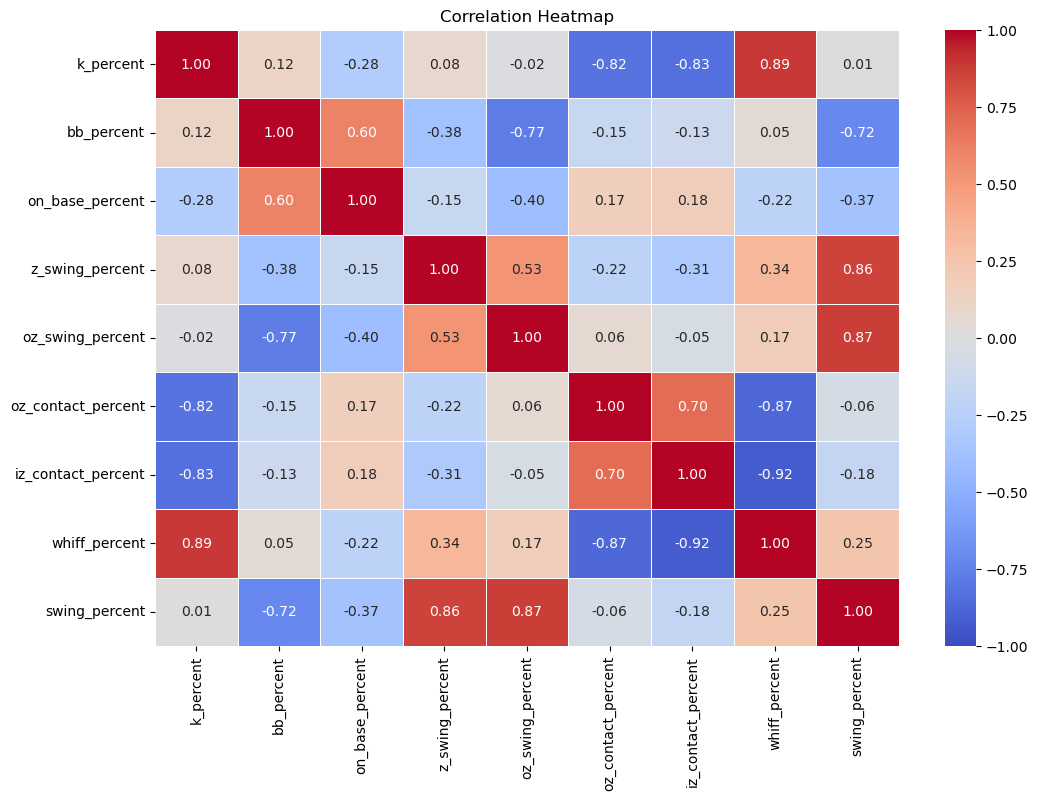

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()   

In [56]:
# 스윙률 변수 삭제 후 상관분석
selected_data = selected_data.drop(columns=['swing_percent'])
correlation_matrix = selected_data.corr()
obp_correlations = correlation_matrix['on_base_percent'].sort_values(ascending=False)
obp_correlations

on_base_percent       1.000000
bb_percent            0.590737
iz_contact_percent    0.178751
oz_contact_percent    0.169108
z_swing_percent      -0.152172
whiff_percent        -0.222827
k_percent            -0.283637
oz_swing_percent     -0.402165
Name: on_base_percent, dtype: float64

In [57]:
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
highly_correlated_pairs

k_percent      whiff_percent    0.883436
whiff_percent  k_percent        0.883436
dtype: float64

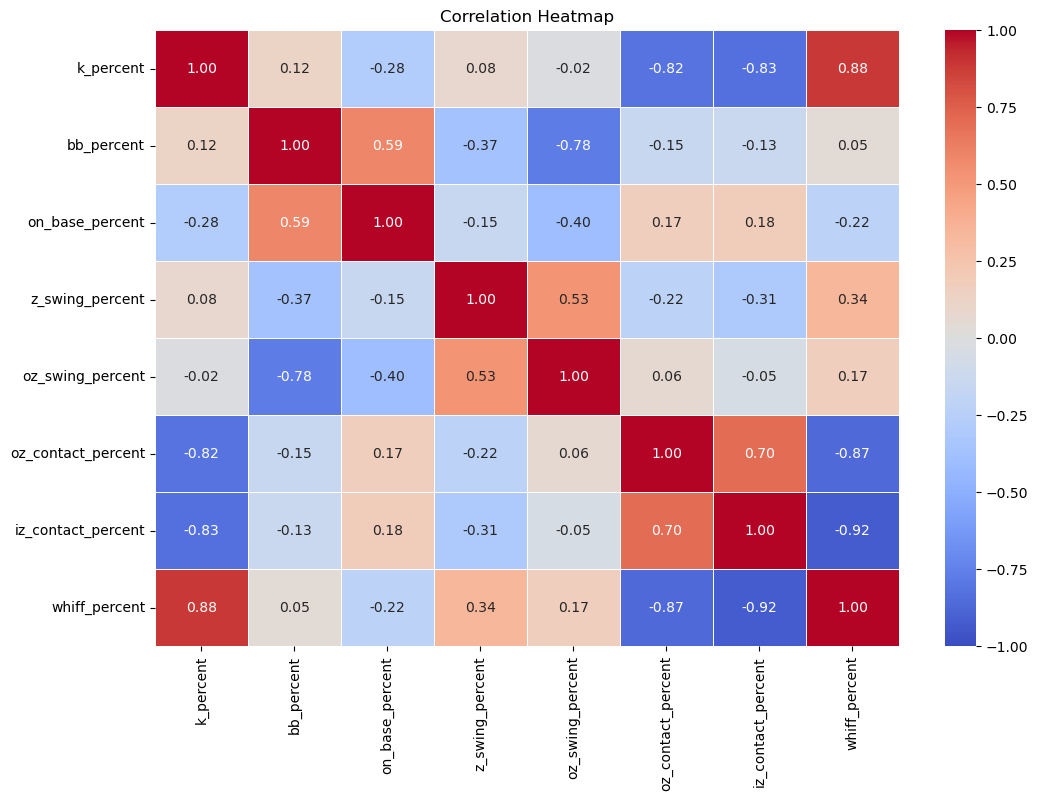

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [59]:
# Scaling
# Define lists of proportion-based and numeric features
proportion_features = ["k_percent", "bb_percent", 
                       "z_swing_percent", "oz_swing_percent", "oz_contact_percent",
                       "iz_contact_percent", "whiff_percent"]
numeric_features = selected_data.select_dtypes(include=[float, int]).columns.difference(['on_base_percent'] + proportion_features)

# Initialize scalers
standard_scaler = StandardScaler()

# Apply StandardScaler to proportion-based features
selected_data[proportion_features] = standard_scaler.fit_transform(selected_data[proportion_features])

In [60]:
### model3 전처리 ###

In [61]:
file_path = 'C:/Users/a/Desktop/프로젝트/model3.csv'
data3 = pd.read_csv(file_path)

data3.head()

,"last_name, first_name",player_id,year,pa,slg_percent,isolated_power,babip,xiso,exit_velocity_avg,launch_angle_avg,...,avg_hyper_speed,meatball_swing_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,groundballs_percent,flyballs_percent,linedrives_percent
0,"Cabrera, Miguel",408234,2021,526,0.386,0.130,0.305,0.186,91.4,10.0,...,95.613068,77.4,25.8,49.4,32.8,37.2,30.0,49.0,25.9,21.5
1,"Molina, Yadier",425877,2021,473,0.370,0.118,0.283,0.151,88.0,15.3,...,92.936144,78.3,24.0,57.1,43.4,34.3,22.3,42.6,29.1,21.7
2,"Cruz Jr., Nelson",443558,2021,584,0.497,0.232,0.286,0.248,92.9,11.8,...,97.364589,89.3,30.7,51.0,36.6,36.4,27.0,43.4,25.5,22.0
3,"Peralta, David",444482,2021,538,0.402,0.143,0.303,0.103,89.3,5.3,...,94.748490,77.6,21.3,46.5,31.2,40.8,28.0,54.9,15.6,23.2
4,"Escobar, Alcides",444876,2021,349,0.404,0.116,0.337,0.091,81.7,11.1,...,91.096948,75.0,21.6,52.1,31.1,38.2,30.7,45.3,20.6,28.8


In [62]:
missing_data_3 = data3.isnull().sum()
missing_data_3

last_name, first_name     0
player_id                 0
year                      0
pa                        0
slg_percent               0
isolated_power            0
babip                     0
xiso                      0
exit_velocity_avg         0
launch_angle_avg          0
sweet_spot_percent        0
barrel_batted_rate        0
hard_hit_percent          0
avg_best_speed            0
avg_hyper_speed           0
meatball_swing_percent    0
whiff_percent             0
swing_percent             0
pull_percent              0
straightaway_percent      0
opposite_percent          0
groundballs_percent       0
flyballs_percent          0
linedrives_percent        0
dtype: int64

In [63]:
data3 = data3.drop(columns=['last_name, first_name', 'year', 'pa'], errors='ignore')

In [64]:
columns_of_interest = ['slg_percent','babip','isolated_power','xiso','exit_velocity_avg','launch_angle_avg','sweet_spot_percent',
    'barrel_batted_rate', 'hard_hit_percent','avg_best_speed','avg_hyper_speed','meatball_swing_percent','whiff_percent','swing_percent',
    'pull_percent','straightaway_percent','opposite_percent','groundballs_percent','flyballs_percent','linedrives_percent']

selected_data = data3[columns_of_interest]

selected_data.head()

,slg_percent,babip,isolated_power,xiso,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,meatball_swing_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,groundballs_percent,flyballs_percent,linedrives_percent
0,0.386,0.305,0.130,0.186,91.4,10.0,32.8,8.3,49.0,101.953387,95.613068,77.4,25.8,49.4,32.8,37.2,30.0,49.0,25.9,21.5
1,0.370,0.283,0.118,0.151,88.0,15.3,34.1,5.2,31.6,97.653775,92.936144,78.3,24.0,57.1,43.4,34.3,22.3,42.6,29.1,21.7
2,0.497,0.286,0.232,0.248,92.9,11.8,31.8,13.6,52.5,105.497885,97.364589,89.3,30.7,51.0,36.6,36.4,27.0,43.4,25.5,22.0
3,0.402,0.303,0.143,0.103,89.3,5.3,27.2,5.0,41.8,101.204663,94.748490,77.6,21.3,46.5,31.2,40.8,28.0,54.9,15.6,23.2
4,0.404,0.337,0.116,0.091,81.7,11.1,36.3,3.0,21.0,93.737836,91.096948,75.0,21.6,52.1,31.1,38.2,30.7,45.3,20.6,28.8


In [65]:
correlation_matrix = selected_data.corr()

slg_correlations = correlation_matrix['slg_percent'].sort_values(ascending=False)
slg_correlations

slg_percent               1.000000
isolated_power            0.903759
xiso                      0.804970
barrel_batted_rate        0.701094
avg_hyper_speed           0.630599
avg_best_speed            0.618064
hard_hit_percent          0.610226
exit_velocity_avg         0.606369
flyballs_percent          0.380406
babip                     0.360458
sweet_spot_percent        0.312292
launch_angle_avg          0.238547
pull_percent              0.227544
meatball_swing_percent    0.182113
whiff_percent             0.167619
linedrives_percent        0.072323
swing_percent             0.000028
straightaway_percent     -0.153713
opposite_percent         -0.188257
groundballs_percent      -0.333395
Name: slg_percent, dtype: float64

In [66]:
for column in selected_data.columns:
    lower_bound = np.percentile(selected_data[column], 1)
    upper_bound = np.percentile(selected_data[column], 99)
    selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)

selected_data.describe()

C:\Users\a\AppData\Local\Temp\ipykernel_35872\2140555326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_35872\2140555326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_35872\2140555326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,slg_percent,babip,isolated_power,xiso,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,meatball_swing_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,groundballs_percent,flyballs_percent,linedrives_percent
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,0.417828,0.296299,0.166626,0.165396,89.071463,13.031216,33.985249,8.339628,39.963599,99.952511,94.235993,77.454837,24.893206,47.889177,38.336408,36.782472,24.879063,42.826916,26.344809,23.920583
std,0.065120,0.033882,0.053015,0.053655,2.115698,4.521335,3.593069,4.049616,7.224418,2.356601,1.375763,6.597897,5.924829,4.694694,5.834419,3.651736,4.038671,6.477217,5.335372,2.858725
min,0.280020,0.215170,0.060340,0.066000,84.117000,2.800000,25.734000,1.117000,21.634000,94.484371,91.302907,61.685000,11.834000,37.617000,25.185000,28.017000,15.917000,29.017000,15.417000,16.951000
25%,0.373000,0.274000,0.127000,0.127250,87.700000,10.000000,31.500000,5.200000,35.400000,98.371044,93.285052,73.000000,20.700000,44.600000,34.225000,34.200000,22.200000,38.300000,22.500000,21.825000
50%,0.412500,0.297000,0.162000,0.161000,89.000000,13.150000,34.000000,7.900000,40.150000,99.887999,94.154369,77.500000,24.700000,47.800000,38.300000,36.700000,24.800000,42.700000,26.000000,23.900000
75%,0.459000,0.320000,0.201000,0.200000,90.400000,16.100000,36.375000,10.975000,44.900000,101.441696,95.073982,82.100000,29.000000,51.000000,42.300000,39.300000,27.500000,47.175000,30.100000,25.900000
max,0.600320,0.371830,0.311980,0.316660,94.566000,22.600000,42.900000,20.100000,55.883000,106.095136,98.129434,92.349000,38.883000,59.483000,52.232000,45.400000,35.449000,57.349000,39.866000,30.900000


In [67]:
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
highly_correlated_pairs

slg_percent         isolated_power        0.903759
                    xiso                  0.804970
isolated_power      slg_percent           0.903759
                    xiso                  0.893237
                    barrel_batted_rate    0.845054
xiso                slg_percent           0.804970
                    isolated_power        0.893237
                    barrel_batted_rate    0.946862
                    avg_hyper_speed       0.807653
exit_velocity_avg   hard_hit_percent      0.934119
                    avg_best_speed        0.915418
                    avg_hyper_speed       0.937192
launch_angle_avg    flyballs_percent      0.842492
barrel_batted_rate  isolated_power        0.845054
                    xiso                  0.946862
                    avg_best_speed        0.823189
                    avg_hyper_speed       0.829677
hard_hit_percent    exit_velocity_avg     0.934119
                    avg_best_speed        0.949137
                    avg_hyper_s

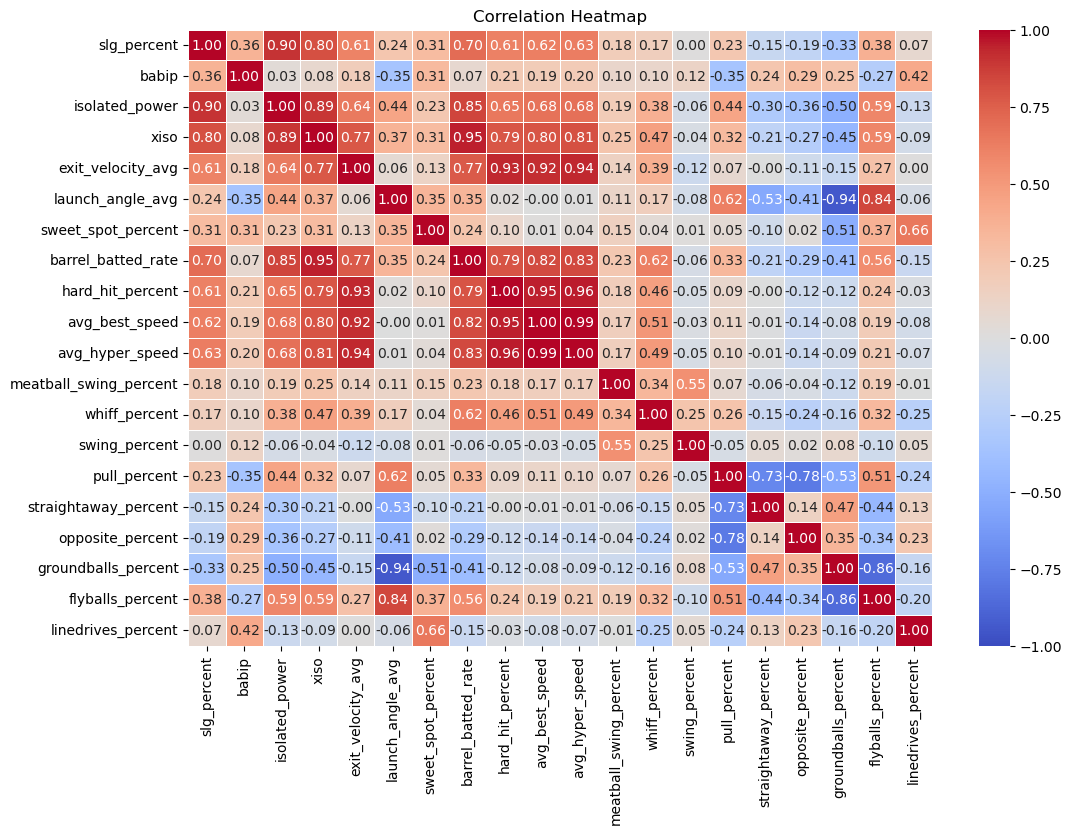

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [69]:
# Scaling
# Define lists of proportion-based and numeric features
proportion_features = ["babip", "isolated_power", "xiso",  
                       "sweet_spot_percent", "barrel_batted_rate", "hard_hit_percent",
                       "meatball_swing_percent", "whiff_percent", "swing_percent",
                       "pull_percent", "straightaway_percent", "opposite_percent",
                       "groundballs_percent", "flyballs_percent", "linedrives_percent"]
numeric_features = selected_data.select_dtypes(include=[float, int]).columns.difference(['slg_percent'] + proportion_features)

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler to proportion-based features
selected_data[proportion_features] = standard_scaler.fit_transform(selected_data[proportion_features])

# Apply MinMaxScaler to numeric features, ensuring only numeric columns are scaled
selected_data[numeric_features] = minmax_scaler.fit_transform(selected_data[numeric_features])

C:\Users\a\AppData\Local\Temp\ipykernel_35872\1469466994.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[proportion_features] = standard_scaler.fit_transform(selected_data[proportion_features])
C:\Users\a\AppData\Local\Temp\ipykernel_35872\1469466994.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[numeric_features] = minmax_scaler.fit_transform(selected_data[numeric_features])
